# Field of Streams Approach

In [1]:
from Analysis import query_gaia_halo_rgb
from Analysis import reddening_correction
from Analysis import halo_rgb_filter
from Analysis import plot_sky_density

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rerun_gaia = False

### Limits of RA and DEC from Field of Stream

In [3]:
# Field of stream global boundaries
fs_ra_min, fs_ra_max = 120.0, 220.0  # degrees
fs_dec_min, fs_dec_max = -10.0, 50.0  # degrees

### Gaia Query - Do Not Require Radial Velocity Info

In [4]:
if rerun_gaia:
    field_streams_non_rv = query_gaia_halo_rgb(ra_min = fs_ra_min, ra_max = fs_ra_max, dec_min = fs_dec_min, dec_max = fs_dec_max, g_max=24, parallax_max=1.0, ruwe_max=1.4, chunk_size=5, radial_velocity = False , save_path = 'data/FS_gaia_non_rv.csv')

### Gaia Query - Do Not Require Radial Velocity Info

In [5]:
if rerun_gaia:
    field_streams_rv = query_gaia_halo_rgb(ra_min = fs_ra_min, ra_max = fs_ra_max, dec_min = fs_dec_min, dec_max = fs_dec_max, g_max=24, parallax_max=1.0, ruwe_max=1.4, chunk_size=5, radial_velocity = True , save_path = 'data/FS_gaia_rv.csv')

### Re-Extract Data

In [6]:
# --------------- Re-Load Gaia Data from file ---------------
FS_gaia_non_rv = pd.read_csv('data/FS_gaia_non_rv.csv')
FS_gaia_rv = pd.read_csv('data/FS_gaia_rv.csv')

### Preform Extinction/ Reddening Correction

In [7]:
# Dereddened magnitudes and store the results
FS_gaia_non_rv_dered = reddening_correction(FS_gaia_non_rv)

### Further filter for Red Giant Branch stars

In [8]:
FS_gaia_halo = halo_rgb_filter(FS_gaia_non_rv_dered, min_br=1, max_br=2.5, min_abs_mag=3, halo_radius_min=15, halo_radius_max=300, pm_min = 5)

Total stars before filtering: 18667
Stars passing BP-RP color filter: 18493 (99.07%)
Stars passing absolute magnitude filter: 18570 (99.48%)
Stars passing halo distance filter: 2638 (14.13%)
Stars passing proper motion filter: 10917 (58.48%)
Stars passing all filters: 2405 (12.88%)


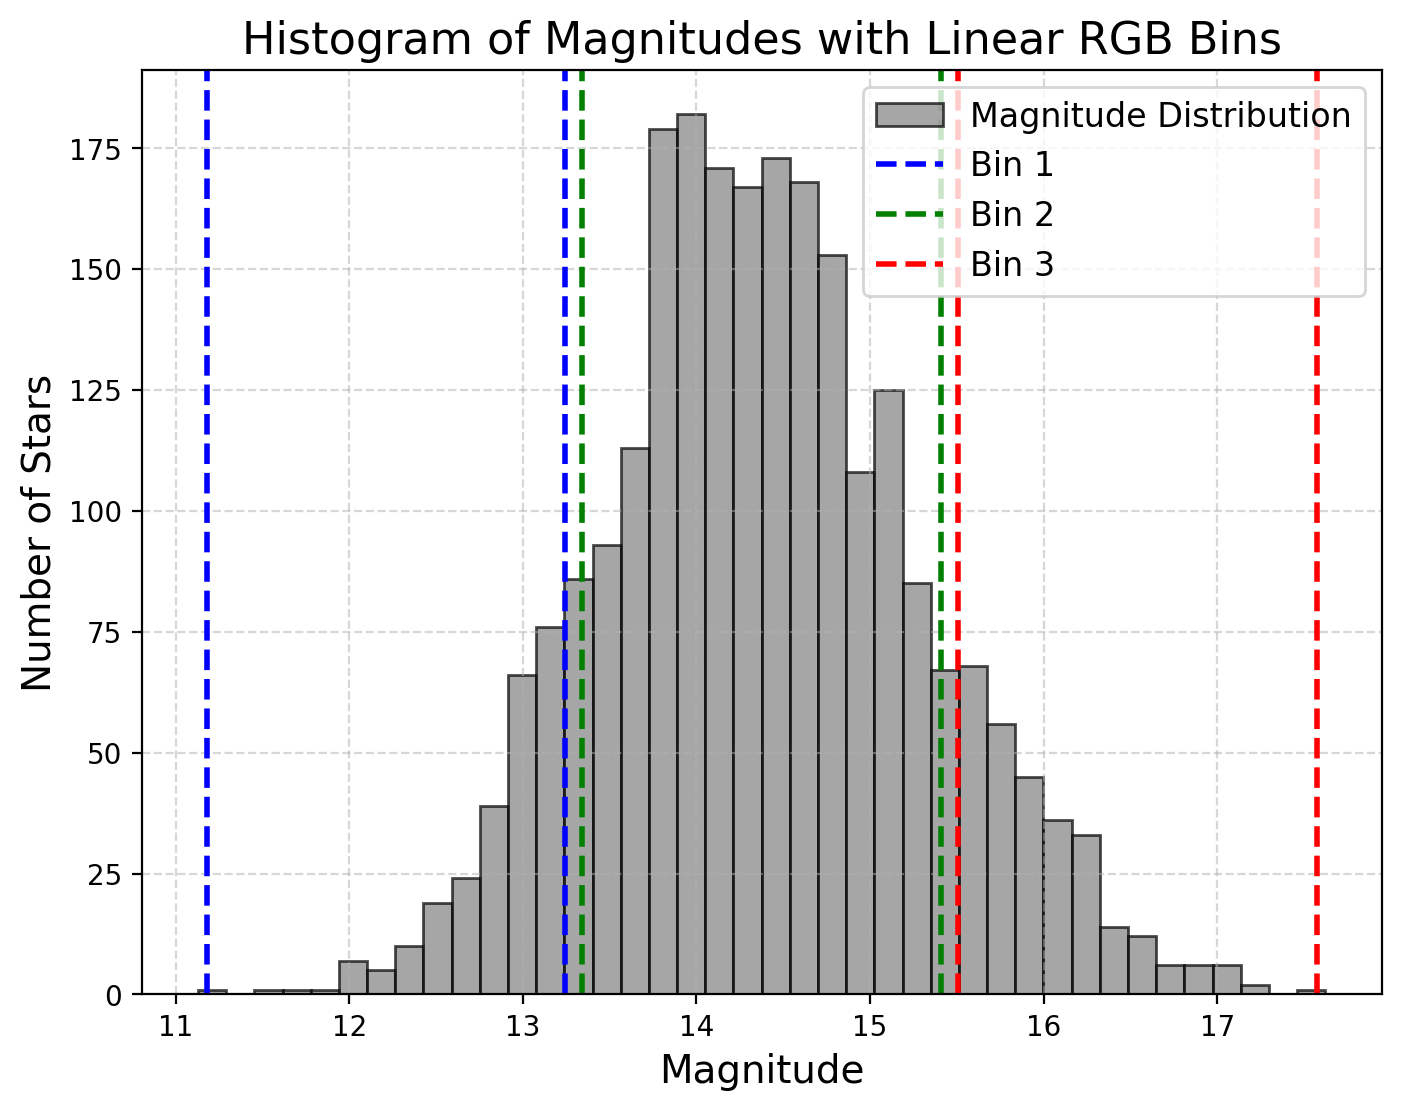

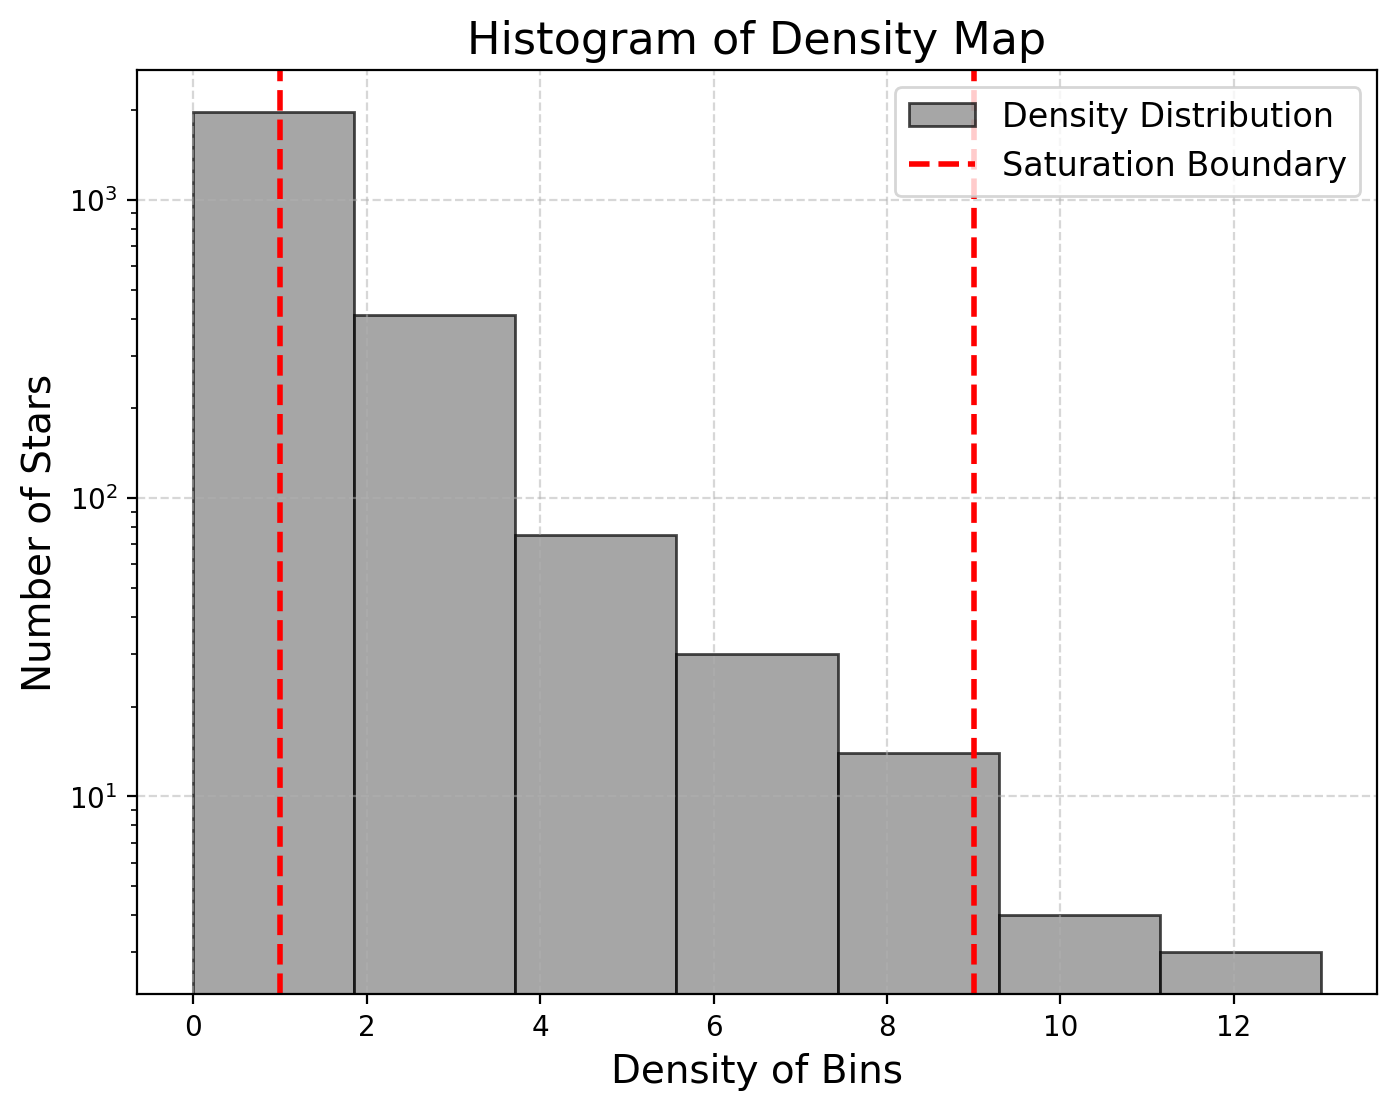

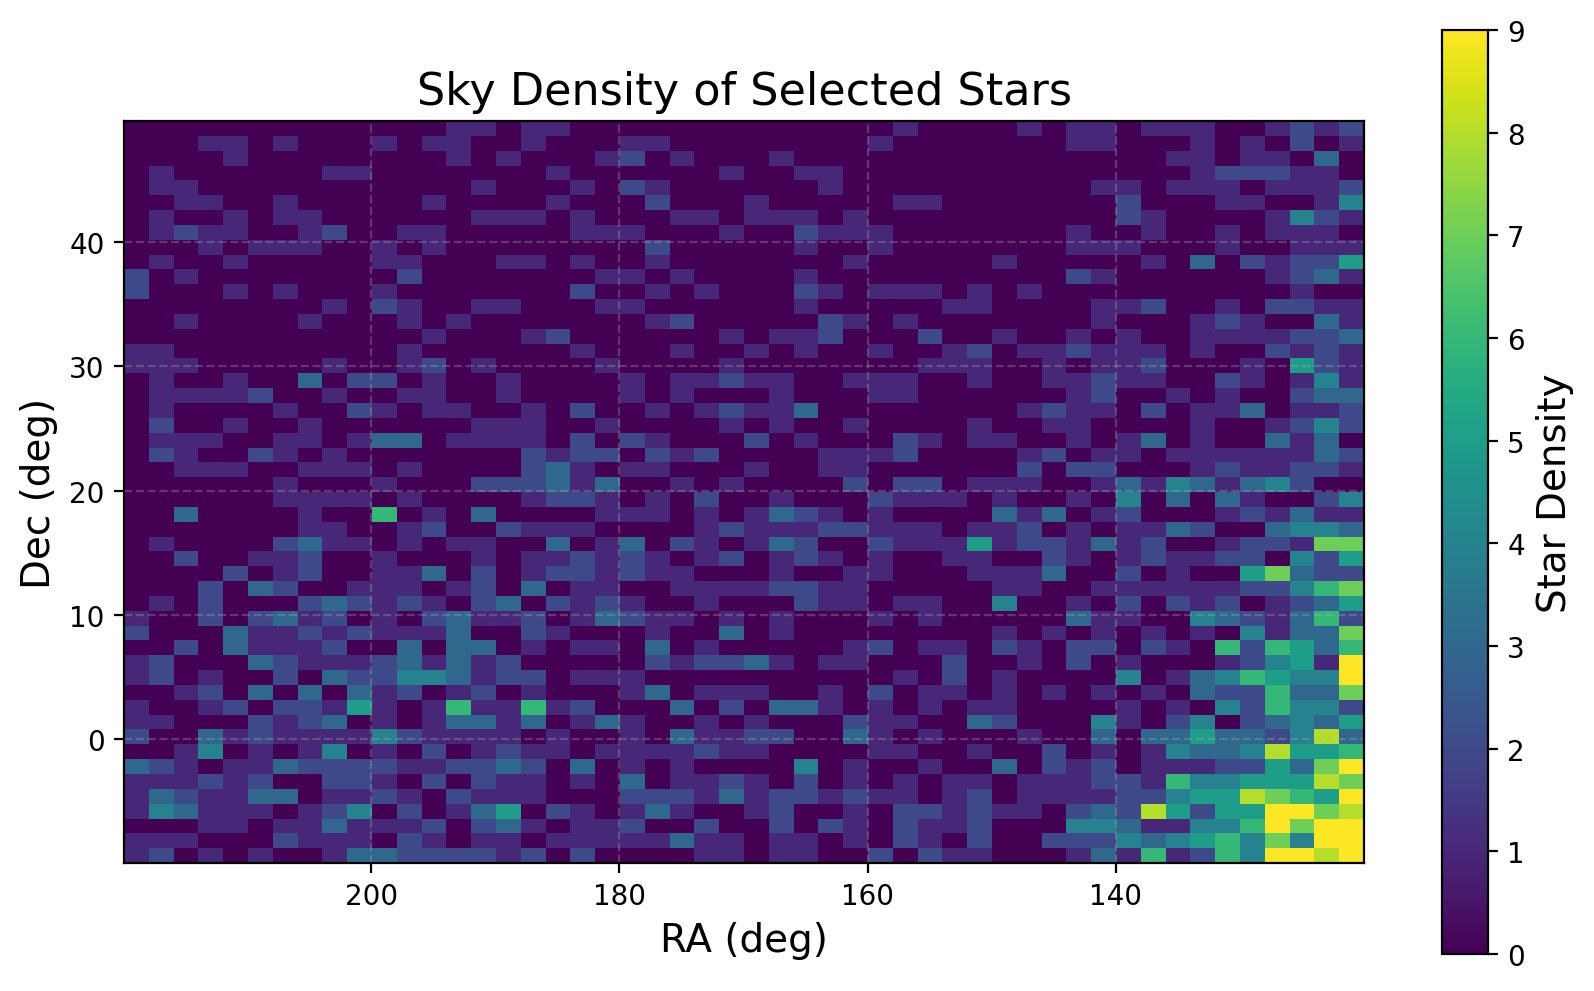

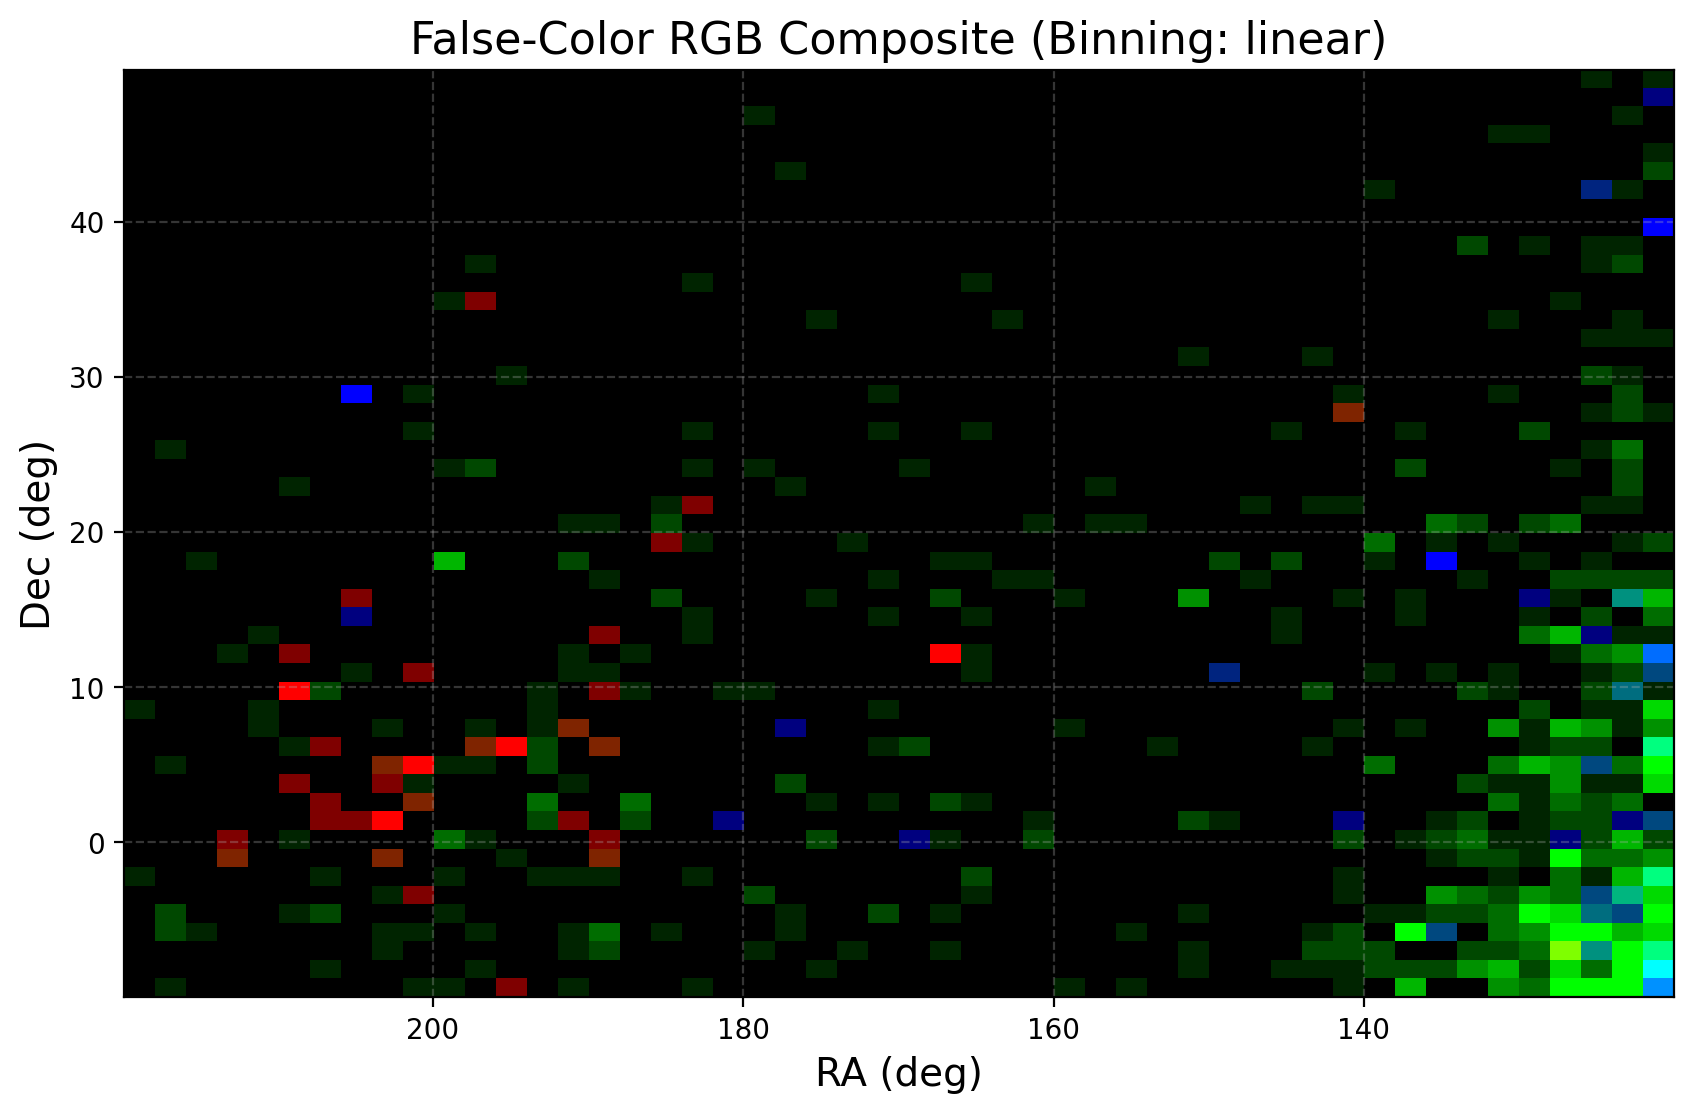

In [10]:
plot_sky_density(FS_gaia_halo, bins=50, contrast=(0, 99), binning_method="linear", cmap_density="viridis", log_scale=False)